In [1]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 

import statsmodels.formula.api as smf

from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df =pd.read_csv('Admission_Prediction.csv')


In [5]:
# checkgin first 5 row from the dataset
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [6]:
df.shape

(500, 9)

In [7]:
#printing the summry of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [8]:
#finding the count of missing value from diffrent column

df.isnull()  #finding the count of missing value form of true and false in column

df.isnull().sum()  #finding the count of missing value from diffrent column

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [9]:
df["GRE Score"].mode()

0    312.0
1    324.0
dtype: float64

In [10]:
df['GRE Score'].fillna(df['GRE Score'].mode()[0],inplace = True)

#to replace the missing value in the "GRE Score" column with the mode of the column

#mode has been used here to replace the GRE score  with the most occoring score so that data folow the general trend

In [11]:
df['TOEFL Score'].fillna(df['TOEFL Score'].mode()[0],inplace = True)

#to replace the missing value in the "TOEFL Score" column with the mode of the column

#mode has been used here to replace the TOEFL score  with the most occoring score so that data folow the general trend

In [12]:
df['University Rating'].fillna(df['University Rating'].mean(),inplace = True)

#to replace the missing value in the "University Rating" column with the mode of the column

#mean has been used here to replace the University Rating with the average score

In [13]:
#droping the "Chance of admit" and "serial numrber" as thet are not going to be used as a features for prediction 
x = df.drop(["Chance of Admit","Serial No."],axis = 1)

#'Chance of admit' is the target column which shows the probability of addmission for a candidate 

y = df["Chance of Admit"]

In [14]:
x.head()      # checking  the transfomed feature columns

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.0,118.0,4.0,4.5,4.5,9.65,1
1,324.0,107.0,4.0,4.0,4.5,8.87,1
2,312.0,104.0,3.0,3.0,3.5,8.00,1
3,322.0,110.0,3.0,3.5,2.5,8.67,1
4,314.0,103.0,2.0,2.0,3.0,8.21,0


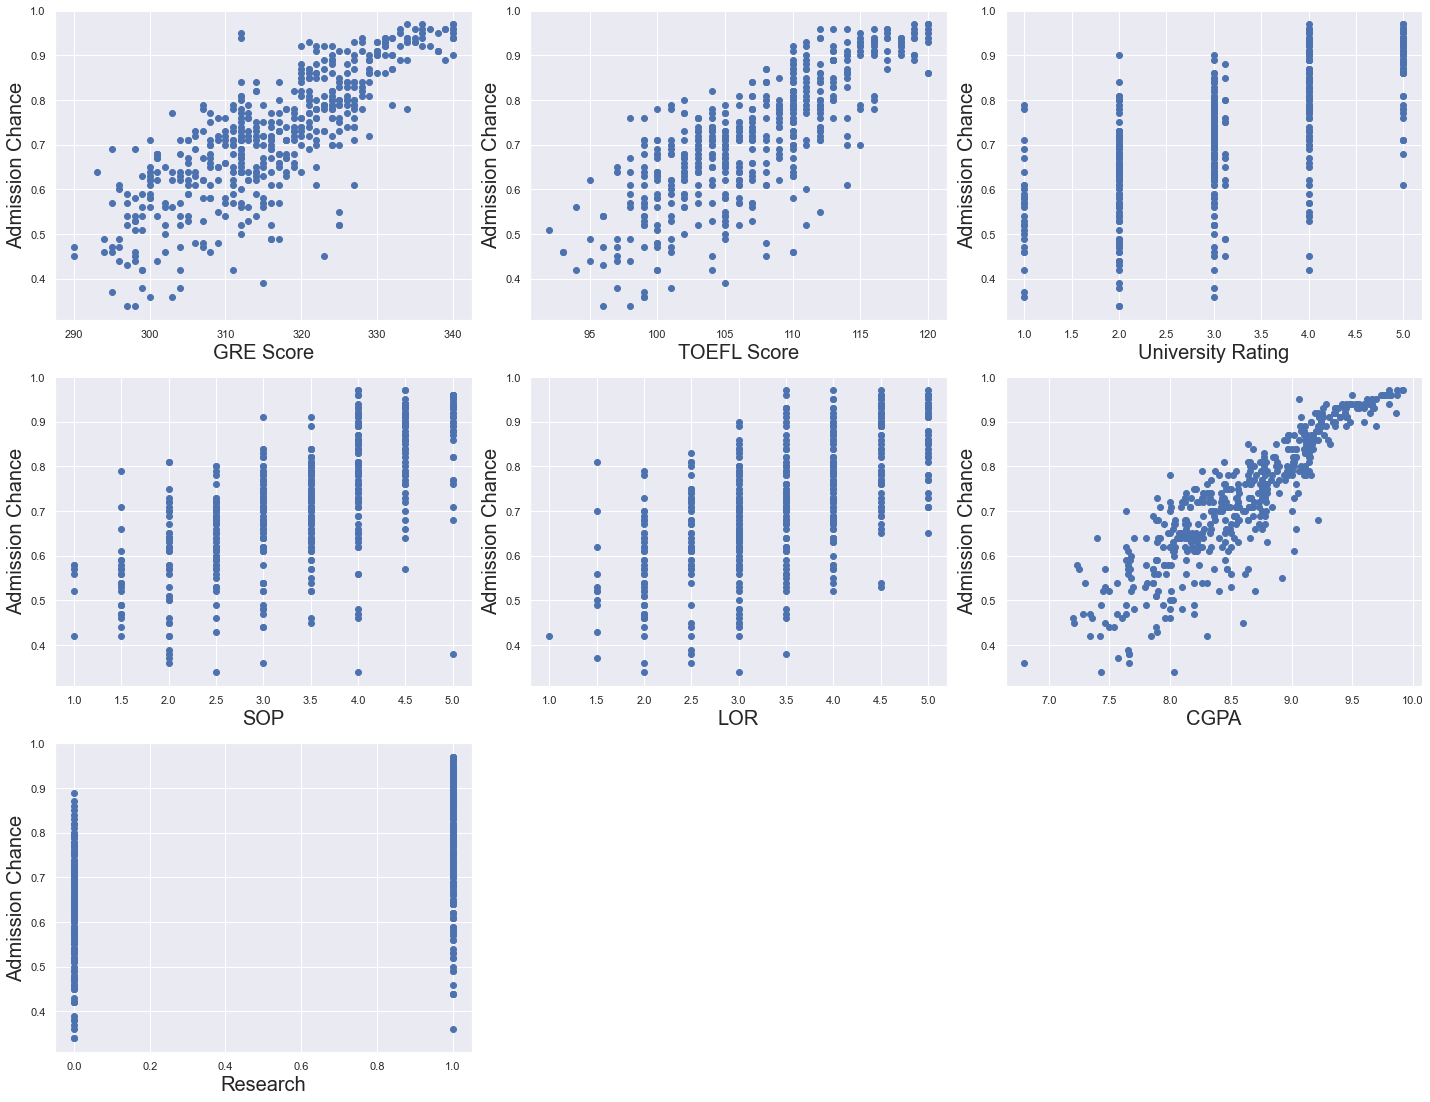

In [15]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=16 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Admission Chance',fontsize=20)
    plotnumber+=1
plt.tight_layout()

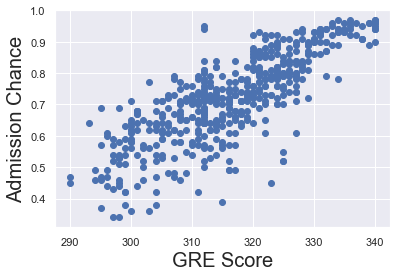

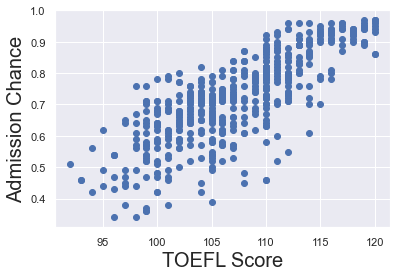

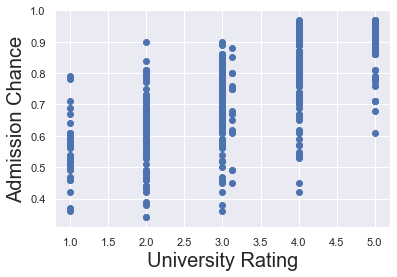

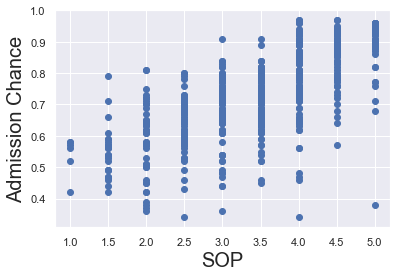

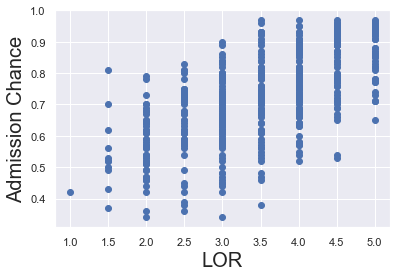

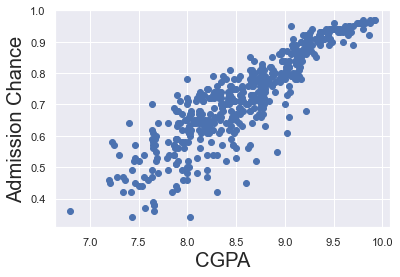

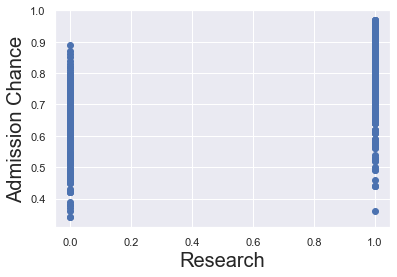

<Figure size 432x288 with 0 Axes>

In [16]:
#Showcasing the relationship between all the columns and the label
for col in x.columns:
    plt.scatter(x[col],y)
    plt.xlabel(col,fontsize=20)
    plt.ylabel('Admission Chance',fontsize=20)
    plt.show()
        
plt.tight_layout()


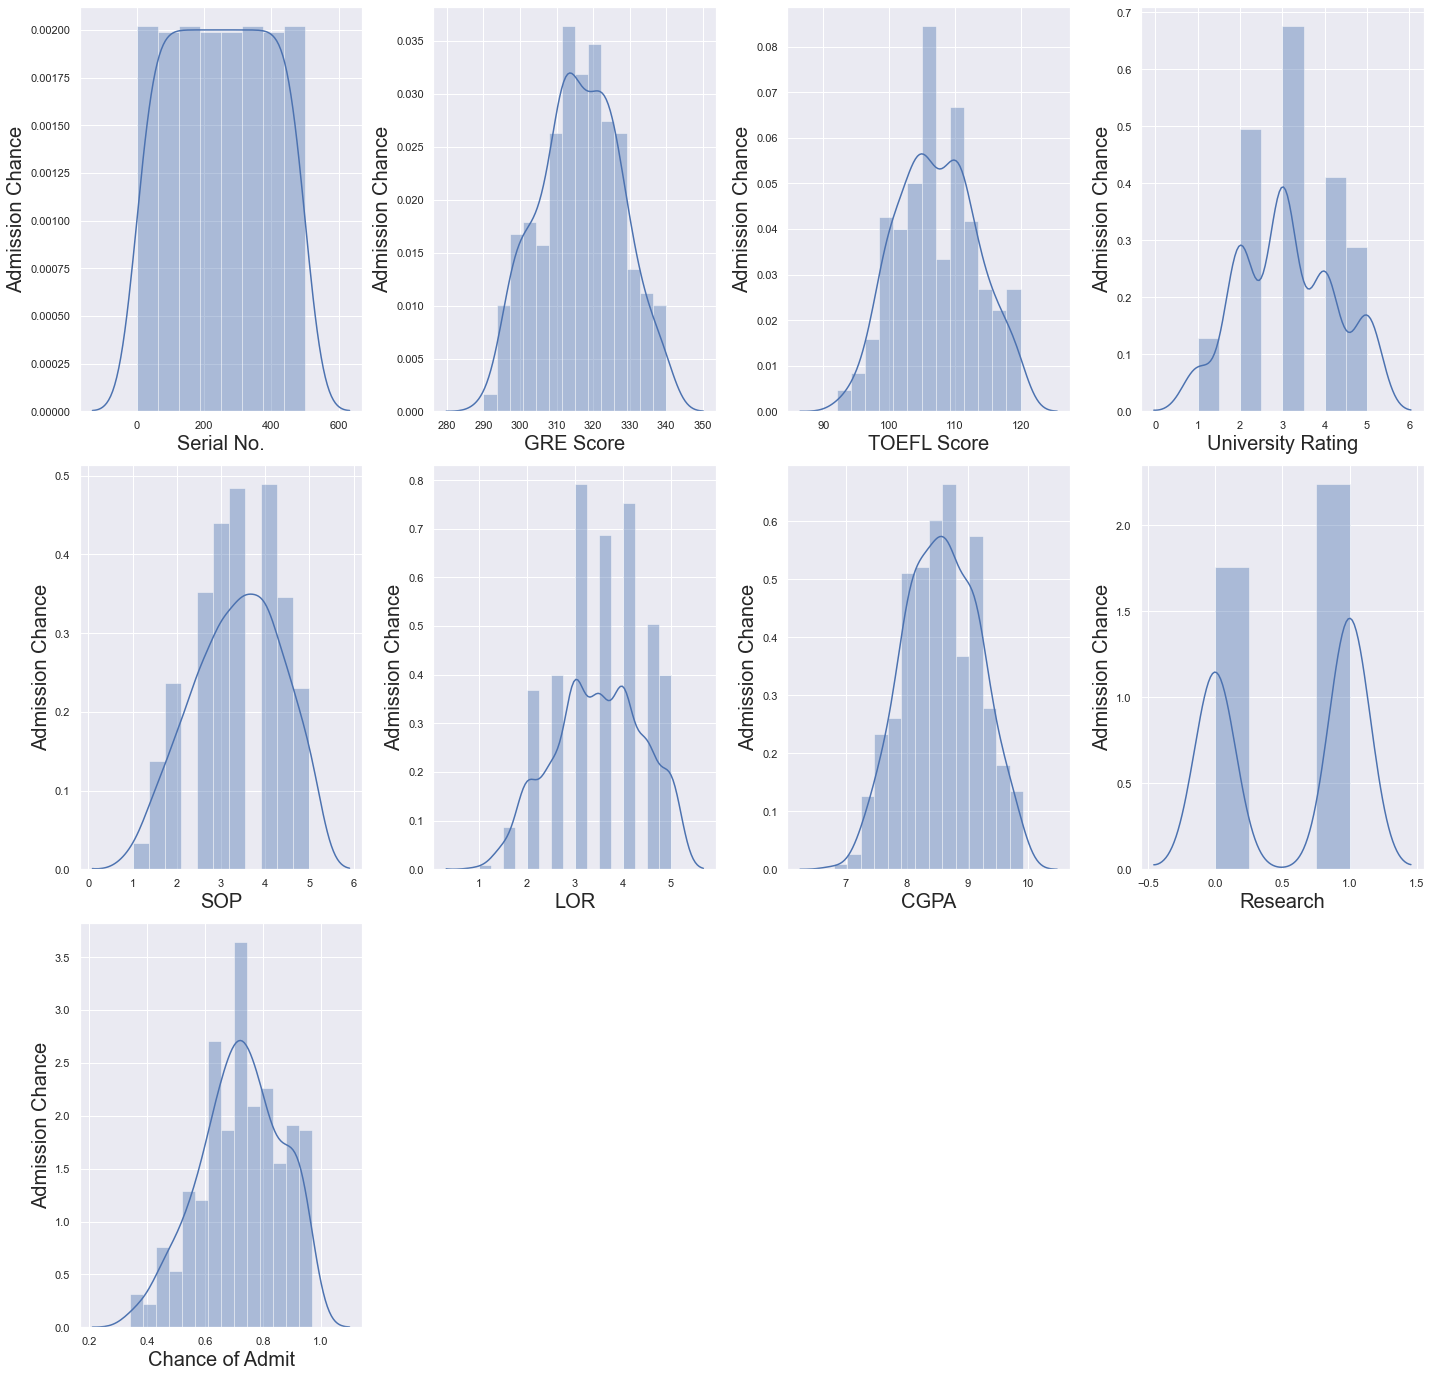

In [17]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Admission Chance',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [18]:
# only used if you want to scale the data 

from sklearn.preprocessing import StandardScaler
scaler_feature = StandardScaler()
scaler_lable = StandardScaler()
scaled_data = scaler_feature.fit_transform(x)
scaled_data

array([[ 1.85052822,  1.77547686,  0.77890565, ...,  1.09894429,
         1.77680627,  0.88640526],
       [ 0.68147064, -0.04027672,  0.77890565, ...,  1.09894429,
         0.48585943,  0.88640526],
       [-0.39765943, -0.53548224, -0.1078766 , ...,  0.01730621,
        -0.95404281,  0.88640526],
       ...,
       [ 1.22103568,  2.10561387,  1.66568791, ...,  1.63976333,
         1.62785086,  0.88640526],
       [-0.39765943, -0.70055074,  0.77890565, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 0.95125316,  0.95013432,  0.77890565, ...,  1.09894429,
         0.76721964, -1.12815215]])

In [19]:
#spliting the data in to training and test sets
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.33,random_state = 100)

In [20]:
# without scaling of data used in model

#ftting the datato the linear regression model
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(train_x,train_y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# calculating the accuracy of the model
from sklearn.metrics import r2_score
score = r2_score(reg.predict(test_x),test_y)
score

0.8076993525686701

In [22]:
reg.predict([[300,110,5,5,5,10,1]])

array([0.93409108])

In [23]:
#Python pickle module is used for serializing and de-serializing a Python object structure to byte code,byte code to object

# saveig the model in to the local file system
filename = 'finalized_model.pickle'
pickle.dump(reg,open(filename,'wb'))   # wb ==> write binary format


In [24]:
loaded_model = pickle.load(open(filename,'rb'))  # rb ==> read binary format
a = loaded_model.predict(scaler_feature.transform([[300,110,5,5,5,10,1]]))  

# if datd is used scaler feature then need to use for prediction
a

array([-0.91190243])

# Chance_of_Admission_Prediction_Regression_model

In [29]:
loaded_model = pickle.load(open(filename,'rb'))  # rb ==> read binary format
b = loaded_model.predict(scaler_feature.fit_transform([[260,50,5,5,5,15,1]]))  

# if datd is used scaler feature then need to use for prediction
a

array([0.93409108])

In [28]:
a = loaded_model.predict([[300,110,5,5,5,10,1]])

a

array([0.93409108])